# Dublin Air Pollution
#### [ Programming for Data Analysis Project GMIT 2020 ]
<br>

<img align="left" width="340" src="http://airtoxenviro.com/wp-content/uploads/2015/05/Power-Plant-Clip-Art.png">

<br><br><br><br><br><br><br><br><br><br><br><br><br><br>
_Completed by:_ Olga Rozhdestvina (G00387844@gmit.ie)

___

Air pollution is a mixture of solid and gas particles in the air. Every year it causes approximately seven million premature deaths [1]. As air pollution levels increase, there has been a growing interest in modelling the relationship between atmospheric concentration of pollutants and various meteorological conditions in the area studied. [2]

The Air Quality Index, or AQI, is used for measuring the real-time pollution. The higher it is, the greater the level of air pollution. AQI is based on measurement of:

* **NO2** - nitrogen dioxide, 
* **PM10** - particulate matter with a diameter of less than 2.5 micrometers,
* **PM2.5** - particulate matter with a diameter of less than 2.5 micrometers,
* **O3** - ozone,
* **SO2** - sulfur dioxide.

There is a number of meteorological factors that affect AQI. In my analysis I will be looking at wind speed. 

Variables measured for this project: _AQI_ variable is a non-negative integer, _NO2, PM10, PM2.5, O3, SO2, Wind_ are non-negative real numbers with one decimal place and _Wind Direction_ is categorical variable with four possible values: west, north east, north, north west.

> [1] [WHO: Air Pollution](https://www.who.int/health-topics/air-pollution#:~:text=The%20combined%20effects%20of%20ambient,cancer%20and%20acute%20respiratory%20infections.)
<br>
[2] [Joanna A. Kaminska: Probabilistic Forecasting of Nitrogen Dioxide Concentrations at an Urban Road Intersection](https://www.researchgate.net/publication/328978359_Probabilistic_Forecasting_of_Nitrogen_Dioxide_Concentrations_at_an_Urban_Road_Intersection)

___

<br>

#### General Set Up

In [1]:
# Dataframes
import pandas as pd

# Calculations and distributions
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# To register the converters
from pandas.plotting import register_matplotlib_converters
import seaborn as sns

%matplotlib inline
register_matplotlib_converters()

In [2]:
# Colour scheme and styles for plots.
sns.set_theme(palette="Set2", context="paper", font_scale=1.5)

# Better sized plots.
plt.rcParams['figure.figsize'] = (15, 9)

___

<br>

#### Original Data.

I have collected data on air pollution in Dublin for 07/12/2020 from [IQAir](https://www.iqair.com/) - a website of a Swiss air quality technology company. [3] Data on wind speed and direction was collected from [Met Eireann Forecast](https://www.met.ie/) [4]


> [3] [IQAir: Air quality in Dublin](https://www.iqair.com/us/ireland/leinster/dublin)
<br>
[4] [Met Eireann Forecast in Dublin City](https://www.met.ie/weather-forecast/dublin-city#forecasts)

In [3]:
# Simulate the date range
rng = pd.date_range('07/12/2020', periods=24, freq='H')
rng

DatetimeIndex(['2020-07-12 00:00:00', '2020-07-12 01:00:00',
               '2020-07-12 02:00:00', '2020-07-12 03:00:00',
               '2020-07-12 04:00:00', '2020-07-12 05:00:00',
               '2020-07-12 06:00:00', '2020-07-12 07:00:00',
               '2020-07-12 08:00:00', '2020-07-12 09:00:00',
               '2020-07-12 10:00:00', '2020-07-12 11:00:00',
               '2020-07-12 12:00:00', '2020-07-12 13:00:00',
               '2020-07-12 14:00:00', '2020-07-12 15:00:00',
               '2020-07-12 16:00:00', '2020-07-12 17:00:00',
               '2020-07-12 18:00:00', '2020-07-12 19:00:00',
               '2020-07-12 20:00:00', '2020-07-12 21:00:00',
               '2020-07-12 22:00:00', '2020-07-12 23:00:00'],
              dtype='datetime64[ns]', freq='H')

In [4]:
# Original data.
raw_data = {'AQI': [84,74,74,72,72,72,72,72,71,72,72,73,80,74,74,74,74,74,74,76,72,76,68,67],
            'NO2': [32.1,29.7,28.5,26.9,26.1,25.8,26.5,27.3,30.9,41.1,52,55.1,58.3,52,41.7,42.6,41.9,38.7,43.1,37.5,32.4,28.7,27.2,20.6],
            'PM2.5': [28,23,23,22.1,22.2,22.1,22,21.9,21.8,22,22.2,22.4,25.9,23,23.1,23.2,23.1,23.1,22.9,24,22.3,24.1,20.1,19.7],
            'PM10': [36,33,28.1,21.2,21.5,19.8,17.1,16.4,15.1,16.6,21.2,28.6,31.1,25.7,25.5,24.4,30.9,25.9,30.9,32.8,30.7,26.6,21.3,18.4],
            'O3': [1,0.4,0.8,0.4,0.3,0.4,0.7,0.3,0,0.6,0.7,0,0.8,0.8,1.8,1.5,1.1,0.8,0.9,0.8,0.7,1.8,3,4.6],
            'SO2': [5,4.2,4.1,3.9,3.7,4.3,4.8,4.2,4.6,6.6,8.2,9.2,10.6,8.6,6.7,6.8,6.9,6,6.3,5,3.6,4.1,4.1,3.4],
            'Wind': [9,9,9,7,7,7,7,7,6,7,7,9,17,15,15,19,13,17,17,19,19,19,19,22],
            'Wind Direction': ['west','west','west','north west','north west','west','north west','north west','north west','north west','north east','north west','north','north','north west','north west','north west','north_west','west','west','west','west','west','west']
           }


# Create a dataframe.
df = pd.DataFrame(raw_data, index=rng)
#df["Date"] = rng
df

,AQI,NO2,PM2.5,PM10,O3,SO2,Wind,Wind Direction
2020-07-12 00:00:00,84,32.1,28.0,36.0,1.0,5.0,9,west
2020-07-12 01:00:00,74,29.7,23.0,33.0,0.4,4.2,9,west
2020-07-12 02:00:00,74,28.5,23.0,28.1,0.8,4.1,9,west
2020-07-12 03:00:00,72,26.9,22.1,21.2,0.4,3.9,7,north west
2020-07-12 04:00:00,72,26.1,22.2,21.5,0.3,3.7,7,north west
2020-07-12 05:00:00,72,25.8,22.1,19.8,0.4,4.3,7,west
2020-07-12 06:00:00,72,26.5,22.0,17.1,0.7,4.8,7,north west
2020-07-12 07:00:00,72,27.3,21.9,16.4,0.3,4.2,7,north west
2020-07-12 08:00:00,71,30.9,21.8,15.1,0.0,4.6,6,north west
2020-07-12 09:00:00,72,41.1,22.0,16.6,0.6,6.6,7,north west


___

<br>

#### Analysis of the data set.
First let's have a look at the wind and separately what are the highest polutants in Dublin during that day. [5]

> [5] [Stack Overflow: how to get ticks every hour?](https://stackoverflow.com/questions/48790378/how-to-get-ticks-every-hour)

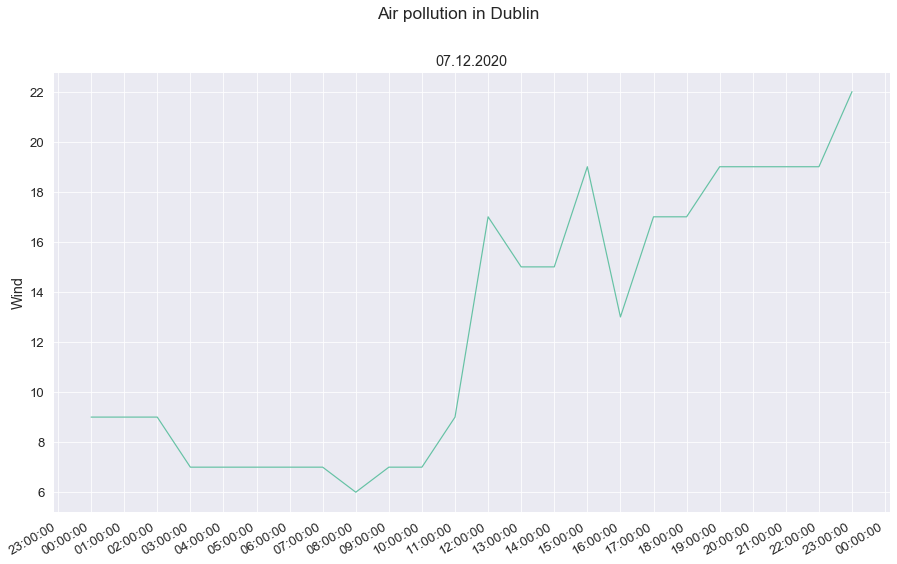

In [5]:
# Create a figure and a set of subplots.
fig, ax = plt.subplots()

# Set a title.
fig.suptitle("Air pollution in Dublin")

# Plot wind data.
sns.lineplot(data=df["Wind"],ax=ax).set_title("07.12.2020")

# Makes the x axis display well.
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()

# Show the plot.
plt.show()

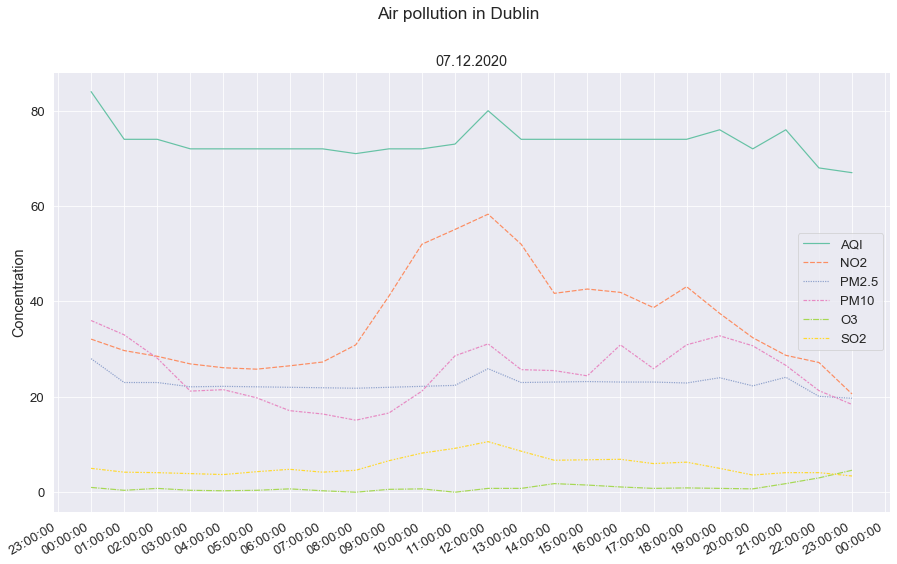

In [6]:
# Create a figure and a set of subplots.
fig, ax = plt.subplots()

# Set title and label for y axis.
fig.suptitle("Air pollution in Dublin")
ax.set_ylabel("Concentration")

# Plot pollutants.
pollutants = df[['AQI','NO2','PM2.5','PM10','O3','SO2']]
sns.lineplot(data=pollutants,ax=ax).set_title("07.12.2020")

# Makes the x axis display well.
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

# Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()

# Show the plot.
plt.show()

<br>

The above plot shows that the primary pollutants are __NO2, PM10, PM2.5__.

NO2 primarily gets in the air from cars, trucks and buses emissions, power plants, and off-road equipment. We can see direct corelation between NO2 concentration and time of the day: it start rising from 7 am and reaches its pick at 12 pm and starts falling at about 7 pm with the traffic coming down. 

The next highest is PM10.  PM10 concentration is due to the same reasons as NO2 (the reason it rises at the same time), but it  is also influenced by the atmospheric conditions. [5] Below is a plot depicting this. [6]

> [5] [Springer Link: Influence of the atmospheric conditions on PM10 concentrations in Poznań, Poland](https://link.springer.com/article/10.1007/s10874-016-9345-5)
<br>
[6] [Stack Overflow: How to change a figure's size in Python Seaborn package
](https://stackoverflow.com/questions/33446029/how-to-change-a-figures-size-in-python-seaborn-package)

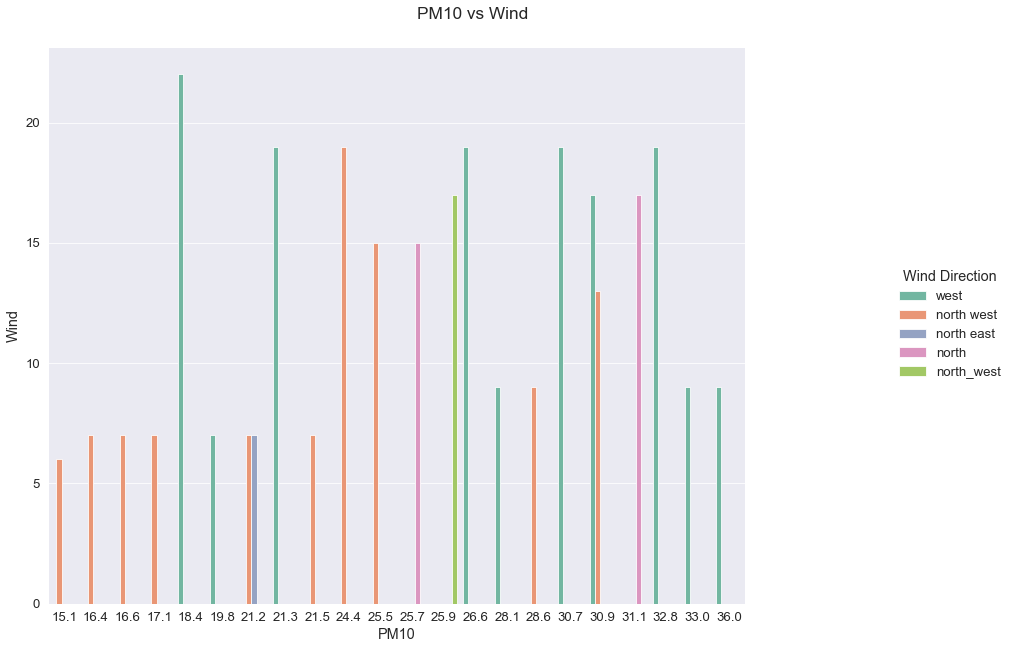

In [7]:
# Plot the data.
g = sns.catplot(x="PM10", y="Wind", data=df, hue="Wind Direction", kind="bar")

# Set title.
g.fig.suptitle("PM10 vs Wind", y=1.02)

# Set size of the plot.
g.fig.set_size_inches(15, 9)

# Show the plot.
plt.show()

<br>

The last in our list is PM2.5. Again, as in case with other pollutants, PM2.5 concentration dependant on transportation volume which is shown on the first plot. Other factors, such as energy consumption, the proportion of electricity consumption etc, also contribute to its level. 

The correlation between PM2.5 concentration and wind speed and direction should be similar to PM10.

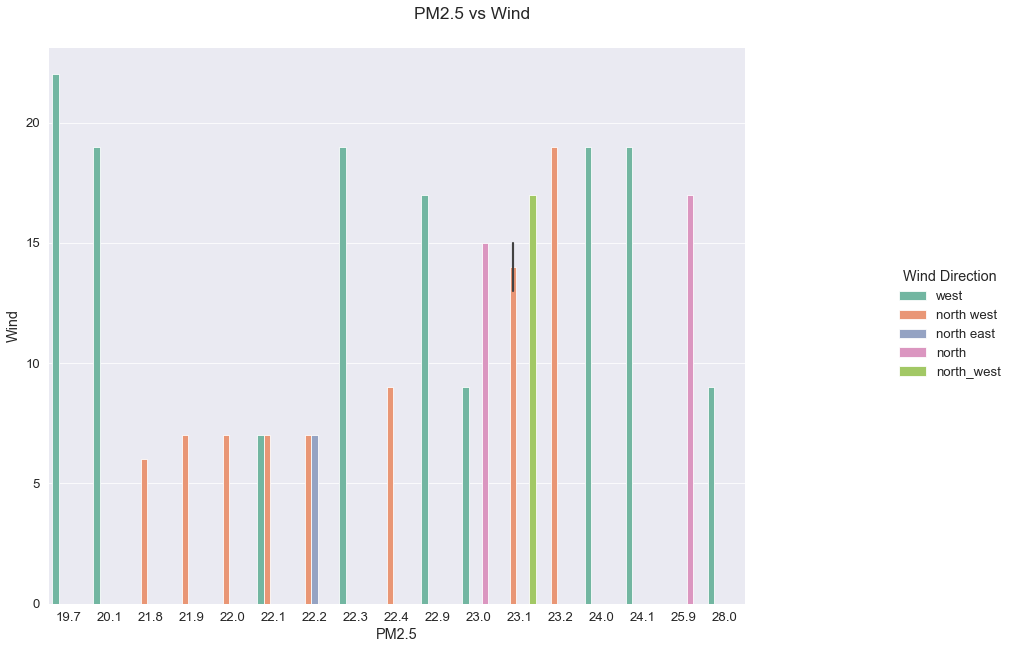

In [8]:
# Plot the data.
g = sns.catplot(x="PM2.5", y="Wind", data=df, hue="Wind Direction", kind="bar")

# Set the title.
g.fig.suptitle("PM2.5 vs Wind", y=1.02)

# Set size of the plot.
g.fig.set_size_inches(15, 9)

# Show the plot.
plt.show()

<br>

It needs to be mentioned that PM10 and PM2.5 were at their highest at midnight when the wind was the lowest. However, since there are other faction for PM10 and PM2.5 levels to rise and the data on such factors is lacking, I cannot make any conclusions on why exactly they were high.

___

<br>

### Simulation of a data set.

In fitting data on air pollution, there are many acceptable distribution models depending on the areas of study. Among the most used distributions are: 
* **gamma**, 
* **lognormal**,
* **Weibull**. [6]

Let's test each type on AQI. 

> [6] [International Journal of Engineering & Technology: Fitting Statistical Distribution on Air Pollution: An Overview](https://www.researchgate.net/publication/329267591_Fitting_Statistical_Distribution_on_Air_Pollution_An_Overview)

In [9]:
# Get an instance of generator.
gen = np.random.default_rng()

# Calculate AQI mean, standard deviation, shape and scale.
AQI_mean = np.mean(df.AQI)
AQI_std = np.std(df.AQI)
AQI_shape = (AQI_mean/ AQI_std)**2
AQI_scale = (AQI_std**2)/AQI_mean

#### Gamma.

In [10]:
# Draw samples from gamma distribution.
s_gamma = gen.gamma(AQI_shape, AQI_scale, 24)

# Display the data.
s_gamma

array([75.50253275, 75.76170883, 71.12995211, 76.19394484, 69.45911767,
       68.58845506, 75.65057416, 76.92717303, 76.26078244, 74.68712901,
       70.49752426, 69.45666118, 71.85097514, 75.24834531, 76.36271636,
       67.48695566, 75.26066065, 79.16052136, 75.652434  , 76.64742959,
       69.26126059, 76.94712166, 71.25354006, 79.83766421])

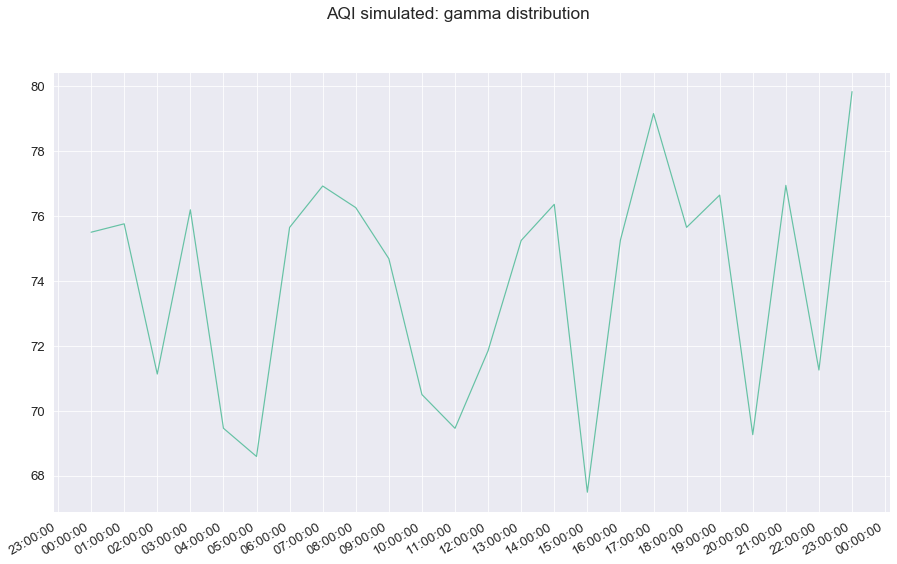

In [11]:
# Create a figure and a set of subplots.
fig, ax = plt.subplots()

# Set a title.
fig.suptitle("AQI simulated: gamma distribution")

# Plot gamma distribution.
sns.lineplot(y=s_gamma, x=rng, ax=ax)

# Makes the x axis display well.
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()

# Show the plot.
plt.show()

#### Lognormal.

In [12]:
# Draw samples from lognormal distribution.
s_lognormal = gen.lognormal(AQI_mean, AQI_std, 24)

# Display the data.
s_lognormal

array([8.23825360e+31, 1.47793234e+32, 1.35110793e+31, 5.52785778e+30,
       8.77412722e+30, 9.74982840e+29, 5.21781915e+32, 2.41983942e+31,
       4.06220409e+34, 9.61950916e+33, 8.16572949e+31, 9.18294133e+29,
       7.28006252e+31, 3.58146070e+33, 4.51173902e+31, 2.50259927e+33,
       2.84960215e+32, 5.97943331e+32, 2.49479520e+28, 2.65710828e+32,
       1.89163097e+35, 8.80301457e+30, 1.46075526e+34, 1.44749633e+32])

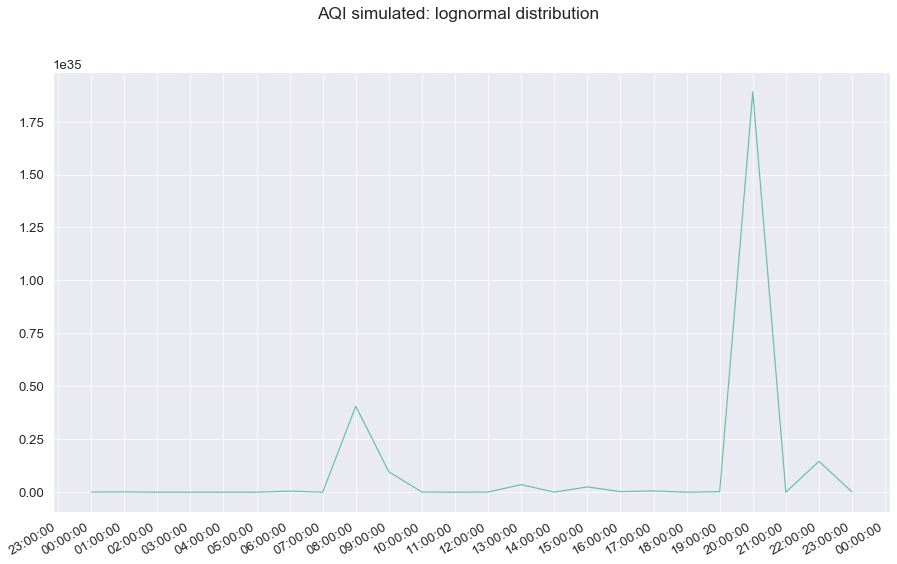

In [13]:
# Create a figure and a set of subplots.
fig, ax = plt.subplots()

# Set a title.
fig.suptitle("AQI simulated: lognormal distribution")

# Plot lognormal distribution.
sns.lineplot(y=s_lognormal, x=rng, ax=ax)

# Makes the x axis display well.
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()

# Show the plot.
plt.show()

#### Weibull.

In [14]:
# Draw samples from weibull distribution.
s_weibull = gen.weibull(AQI_shape, 24)

# Display the data.
s_weibull

array([0.99912137, 0.9951512 , 0.99972825, 0.99497009, 1.00355135,
       0.99414975, 1.00073737, 0.99783278, 1.00288476, 0.99792049,
       1.00311861, 0.99330981, 0.99495821, 0.99815048, 0.99952606,
       1.00227262, 0.99909499, 0.99902336, 1.00135268, 1.00070201,
       1.00002905, 0.99945599, 0.99934094, 0.99786072])

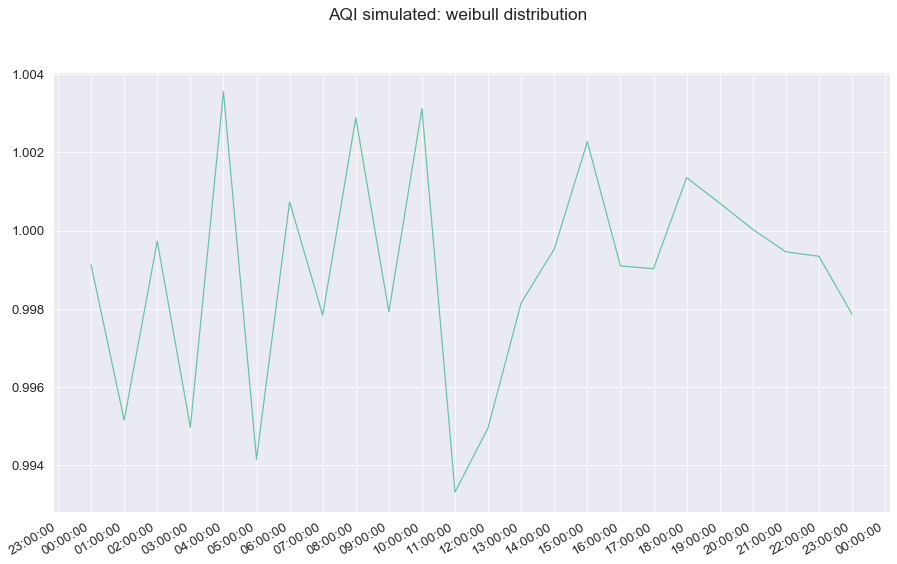

In [15]:
# Create a figure and a set of subplots.
fig, ax = plt.subplots()

# Set a title.
fig.suptitle("AQI simulated: weibull distribution")

# Plot weibull distribution.
sns.lineplot(y=s_weibull, x=rng, ax=ax)

# Makes the x axis display well.
hours = mdates.HourLocator(interval = 1)
h_fmt = mdates.DateFormatter('%H:%M:%S')

#Then tick and format with matplotlib:
ax.xaxis.set_major_locator(hours)
ax.xaxis.set_major_formatter(h_fmt)
fig.autofmt_xdate()

# Show the plot.
plt.show()

It seems that lognormal distribution is the best fitted for our data.

In [16]:
aqi_simulated = pd.DataFrame(AQI_shape, index=rng, columns=["AQI"])
aqi_simulated

,AQI
2020-07-12 00:00:00,490.634412
2020-07-12 01:00:00,490.634412
2020-07-12 02:00:00,490.634412
2020-07-12 03:00:00,490.634412
2020-07-12 04:00:00,490.634412
2020-07-12 05:00:00,490.634412
2020-07-12 06:00:00,490.634412
2020-07-12 07:00:00,490.634412
2020-07-12 08:00:00,490.634412
2020-07-12 09:00:00,490.634412


___

<br>

### Plotting.